<a href="https://www.kaggle.com/code/popoolarofihabiola/image-generation?scriptVersionId=161677480" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install diffusers --upgrade
!pip install invisible_watermark transformers accelerate safetensors

  Obtaining dependency information for diffusers from https://files.pythonhosted.org/packages/a1/7f/18bfbccb1942555e9b2576394e5a4eaf07a973e4fd97b4bd75e1874f42b3/diffusers-0.26.1-py3-none-any.whl.metadata
  Obtaining dependency information for huggingface-hub>=0.20.2 from https://files.pythonhosted.org/packages/28/03/7d3c7153113ec59cfb31e3b8ee773f5f420a0dd7d26d40442542b96675c3/huggingface_hub-0.20.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 kB 20.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.19.4
    Uninstalling huggingface-hub-0.19.4:
      Successfully uninstalled huggingface-hub-0.19.4
  Obtaining dependency information for invisible_watermark from https://files.pythonhosted.org/packages/2b/57/18b5a914f6d7994dd349252873169e946dc824328e9a37fd15ed836deedc/invisible_watermark-0.2.0-py3-none-any.whl.

In [2]:
from diffusers import DiffusionPipeline
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Enter a prompt  a Yoruba female gown style


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

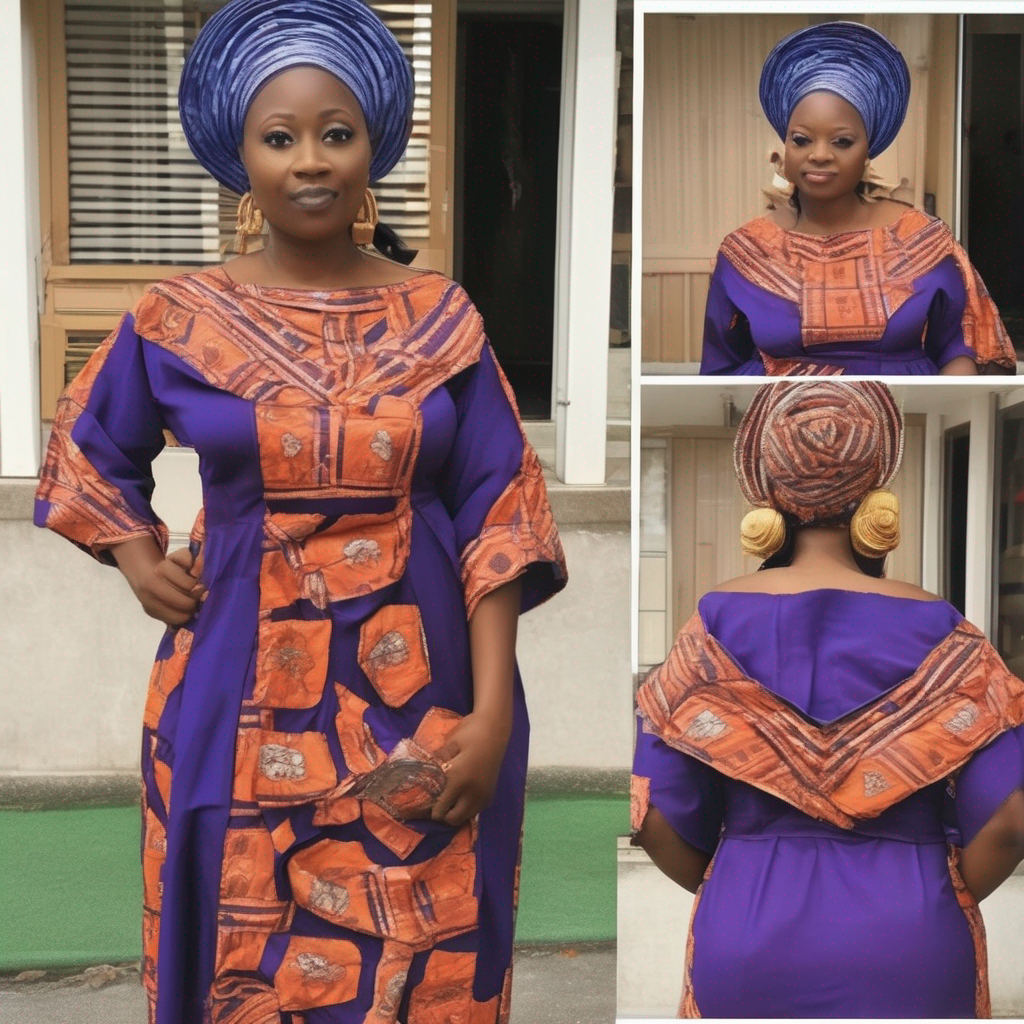

In [6]:
model_id = "/kaggle/input/stable-diffusion-xl/pytorch/base-1-0/1"
prompt = input("Enter a prompt ")

pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")
images = pipe(prompt=prompt).images[0]
images

In [ ]:
from flask import Flask, request, jsonify
from diffusers import DiffusionPipeline

app = Flask(__name__)

# Load the model
model_id = "/kaggle/input/stable-diffusion-xl/pytorch/base-1-0/1"
pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

# Define the API endpoint
@app.route('/generate_image', methods=['POST'])
def generate_image():
    try:
        # Get prompt from the request
        data = request.get_json()
        prompt = data['prompt']

        # Generate images
        images = pipe(prompt=prompt).images[0]

        # Convert images to base64 for response
        # You may need to install the 'PIL' library for image manipulation
        # pip install pillow
        from PIL import Image
        from io import BytesIO
        import base64

        img = Image.fromarray(images)
        buffered = BytesIO()
        img.save(buffered, format="PNG")
        img_str = base64.b64encode(buffered.getvalue()).decode('utf-8')

        # Return the base64-encoded image
        return jsonify({'image': img_str})

    except Exception as e:
        
        return jsonify({'error': str(e)}), 500
# Run the Flask application
if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)

In [ ]:
import requests

url = 'http://127.0.0.1:5000/generate_image'

# Define the JSON payload containing the prompt
payload = {'prompt': 'Your prompt text here'}

# Send the POST request
response = requests.post(url, json=payload)

# Check if the request was successful
if response.status_code == 200:
    # Print the response content
    print(response.json())
else:
    print('Error:', response.text)
